In [1]:
ifstream file1("./data/TOT_1.lvm"); //1 secondo impulso
ifstream file3("./data/TOT_3.lvm"); //0.5 secondo impulso
ifstream file4("./data/TOT_4.lvm"); //1.5 secondo impulso

In [2]:
auto dT1 = new TGraphErrors(); //grafici deltaTemp vs tempo
auto dT3 = new TGraphErrors();
auto dT4 = new TGraphErrors();

In [3]:
auto log1 = new TGraphErrors(); //grafici logaritmici
auto log3 = new TGraphErrors();
auto log4 = new TGraphErrors();

In [4]:
double I = 0.001;
double temp_max = 10; //massimo della temperatura
double t_max = 0; //tempo corrispondende al massimo della temperatura
double d = 0.021; //distanza della misuraione della temperatura dall estremo a cui diamo l impulso
double cost_conversione = 41e-6;
bool control_time = true;
double guadagno = 2060;
double e_VSbarra = 0.0035/(2*sqrt(3));

In [5]:
int i = 0;
double TSbarra,TRes,t; //Temp differenziale, temp PT100
double VSbarra,VRes;   //Tensione diffferenziale, tensione PT100
double VImpulso,R_pt100; //Tensione impuslo, resistenza PT100
//media temperatura a t<12 per togliere un po di offset
double sommaOffset;
double countOffset;
while (file1 >> VImpulso >> t >> VRes >> VSbarra)
{
    //MANCA IL CALCOLO DELLE DIFFERENZA DELLA TENSIONE VRES PER IL CALCOLO DELLA RESISTENZA DELLA PT100 
    TSbarra = VSbarra/(guadagno*cost_conversione);
    TRes = 14e-04*pow(R_pt100,2) + 2.2959 * R_pt100 + 29.77;
    
    //riduzione offset 
    if(t<12)
    {  
        sommaOffset += TSbarra;
        countOffset++;
    }
    double offset= sommaOffset/countOffset;
    
    //massimo della temperatura
    if (TSbarra <= temp_max) 
    {
        temp_max = TSbarra;
        t_max = t;
    }
    
    //punti deltaT vs tempo
    dT1->SetPoint(i,t,abs(TSbarra-offset));
    dT1->SetPointError(i,0.00001,e_VSbarra/(guadagno*cost_conversione));

    //punti linearizzati
    double k = log((abs(TSbarra-offset))*sqrt(t));
    if(t > 0)
    {
        int npunti = dT1->GetN();
        log1->SetPoint(npunti, 1./t, k);
        log1->SetPointError(npunti,(1/(pow(t,4)))*1e-5, (1/(4*t*t))*1e-10+(1/TSbarra*TSbarra)*(e_VSbarra/(guadagno*cost_conversione)));

    }
    i++;
}

In [6]:
int i = 0;
double TSbarra,TRes,t; //Temp differenziale, temp PT100
double VSbarra,VRes;   //Tensione diffferenziale, tensione PT100
double VImpulso,R_pt100; //Tensione impuslo, resistenza PT100
//media temperatura a t<12 per togliere un po di offset
double sommaOffset;
double countOffset;
while (file3 >> VImpulso >> t >> VRes >> VSbarra)
{
    //MANCA IL CALCOLO DELLE DIFFERENZA DELLA TENSIONE VRES PER IL CALCOLO DELLA RESISTENZA DELLA PT100 
    TSbarra = VSbarra/(guadagno*cost_conversione);
    TRes = 14e-04*pow(R_pt100,2) + 2.2959 * R_pt100 + 29.77;
    
    //riduzione offset 
    if(t<12)
    {  
        sommaOffset += TSbarra;
        countOffset++;
    }
    double offset= sommaOffset/countOffset;
    
    //massimo della temperatura
    if (TSbarra <= temp_max) 
    {
        temp_max = TSbarra;
        t_max = t;
    }
    
    //punti deltaT vs tempo
    dT3->SetPoint(i,t,abs(TSbarra-offset));
    dT3->SetPointError(i,0.00001,e_VSbarra/(guadagno*cost_conversione));

    //punti linearizzati
    double k = log((abs(TSbarra-offset))*sqrt(t));
    if(t > 0)
    {
        int npunti = dT3->GetN();
        log3->SetPoint(npunti, 1./t, k);
        log3->SetPointError(npunti,(1/(pow(t,4)))*1e-5, (1/(4*t*t))*1e-10+(1/TSbarra*TSbarra)*(e_VSbarra/(guadagno*cost_conversione)));

    }
    i++;
}

In [7]:
int i = 0;
double TSbarra,TRes,t; //Temp differenziale, temp PT100
double VSbarra,VRes;   //Tensione diffferenziale, tensione PT100
double VImpulso,R_pt100; //Tensione impuslo, resistenza PT100
//media temperatura a t<12 per togliere un po di offset
double sommaOffset;
double countOffset;
while (file4 >> VImpulso >> t >> VRes >> VSbarra)
{
    //MANCA IL CALCOLO DELLE DIFFERENZA DELLA TENSIONE VRES PER IL CALCOLO DELLA RESISTENZA DELLA PT100 
    TSbarra = VSbarra/(guadagno*cost_conversione);
    TRes = 14e-04*pow(R_pt100,2) + 2.2959 * R_pt100 + 29.77;
    
    //riduzione offset 
    if(t<12)
    {  
        sommaOffset += TSbarra;
        countOffset++;
    }
    double offset= sommaOffset/countOffset;
    
    //massimo della temperatura
    if (TSbarra <= temp_max) 
    {
        temp_max = TSbarra;
        t_max = t;
    }
    
    //punti deltaT vs tempo
    dT4->SetPoint(i,t,abs(TSbarra-offset));
    dT4->SetPointError(i,0.00001,e_VSbarra/(guadagno*cost_conversione));

    //punti linearizzati
    double k = log((abs(TSbarra-offset))*sqrt(t));
    if(t > 0)
    {
        int npunti = dT4->GetN();
        log4->SetPoint(npunti, 1./t, k);
        log4->SetPointError(npunti,(1/(pow(t,4)))*1e-5, (1/(4*t*t))*1e-10+(1/TSbarra*TSbarra)*(e_VSbarra/(guadagno*cost_conversione)));

    }
    i++;
}

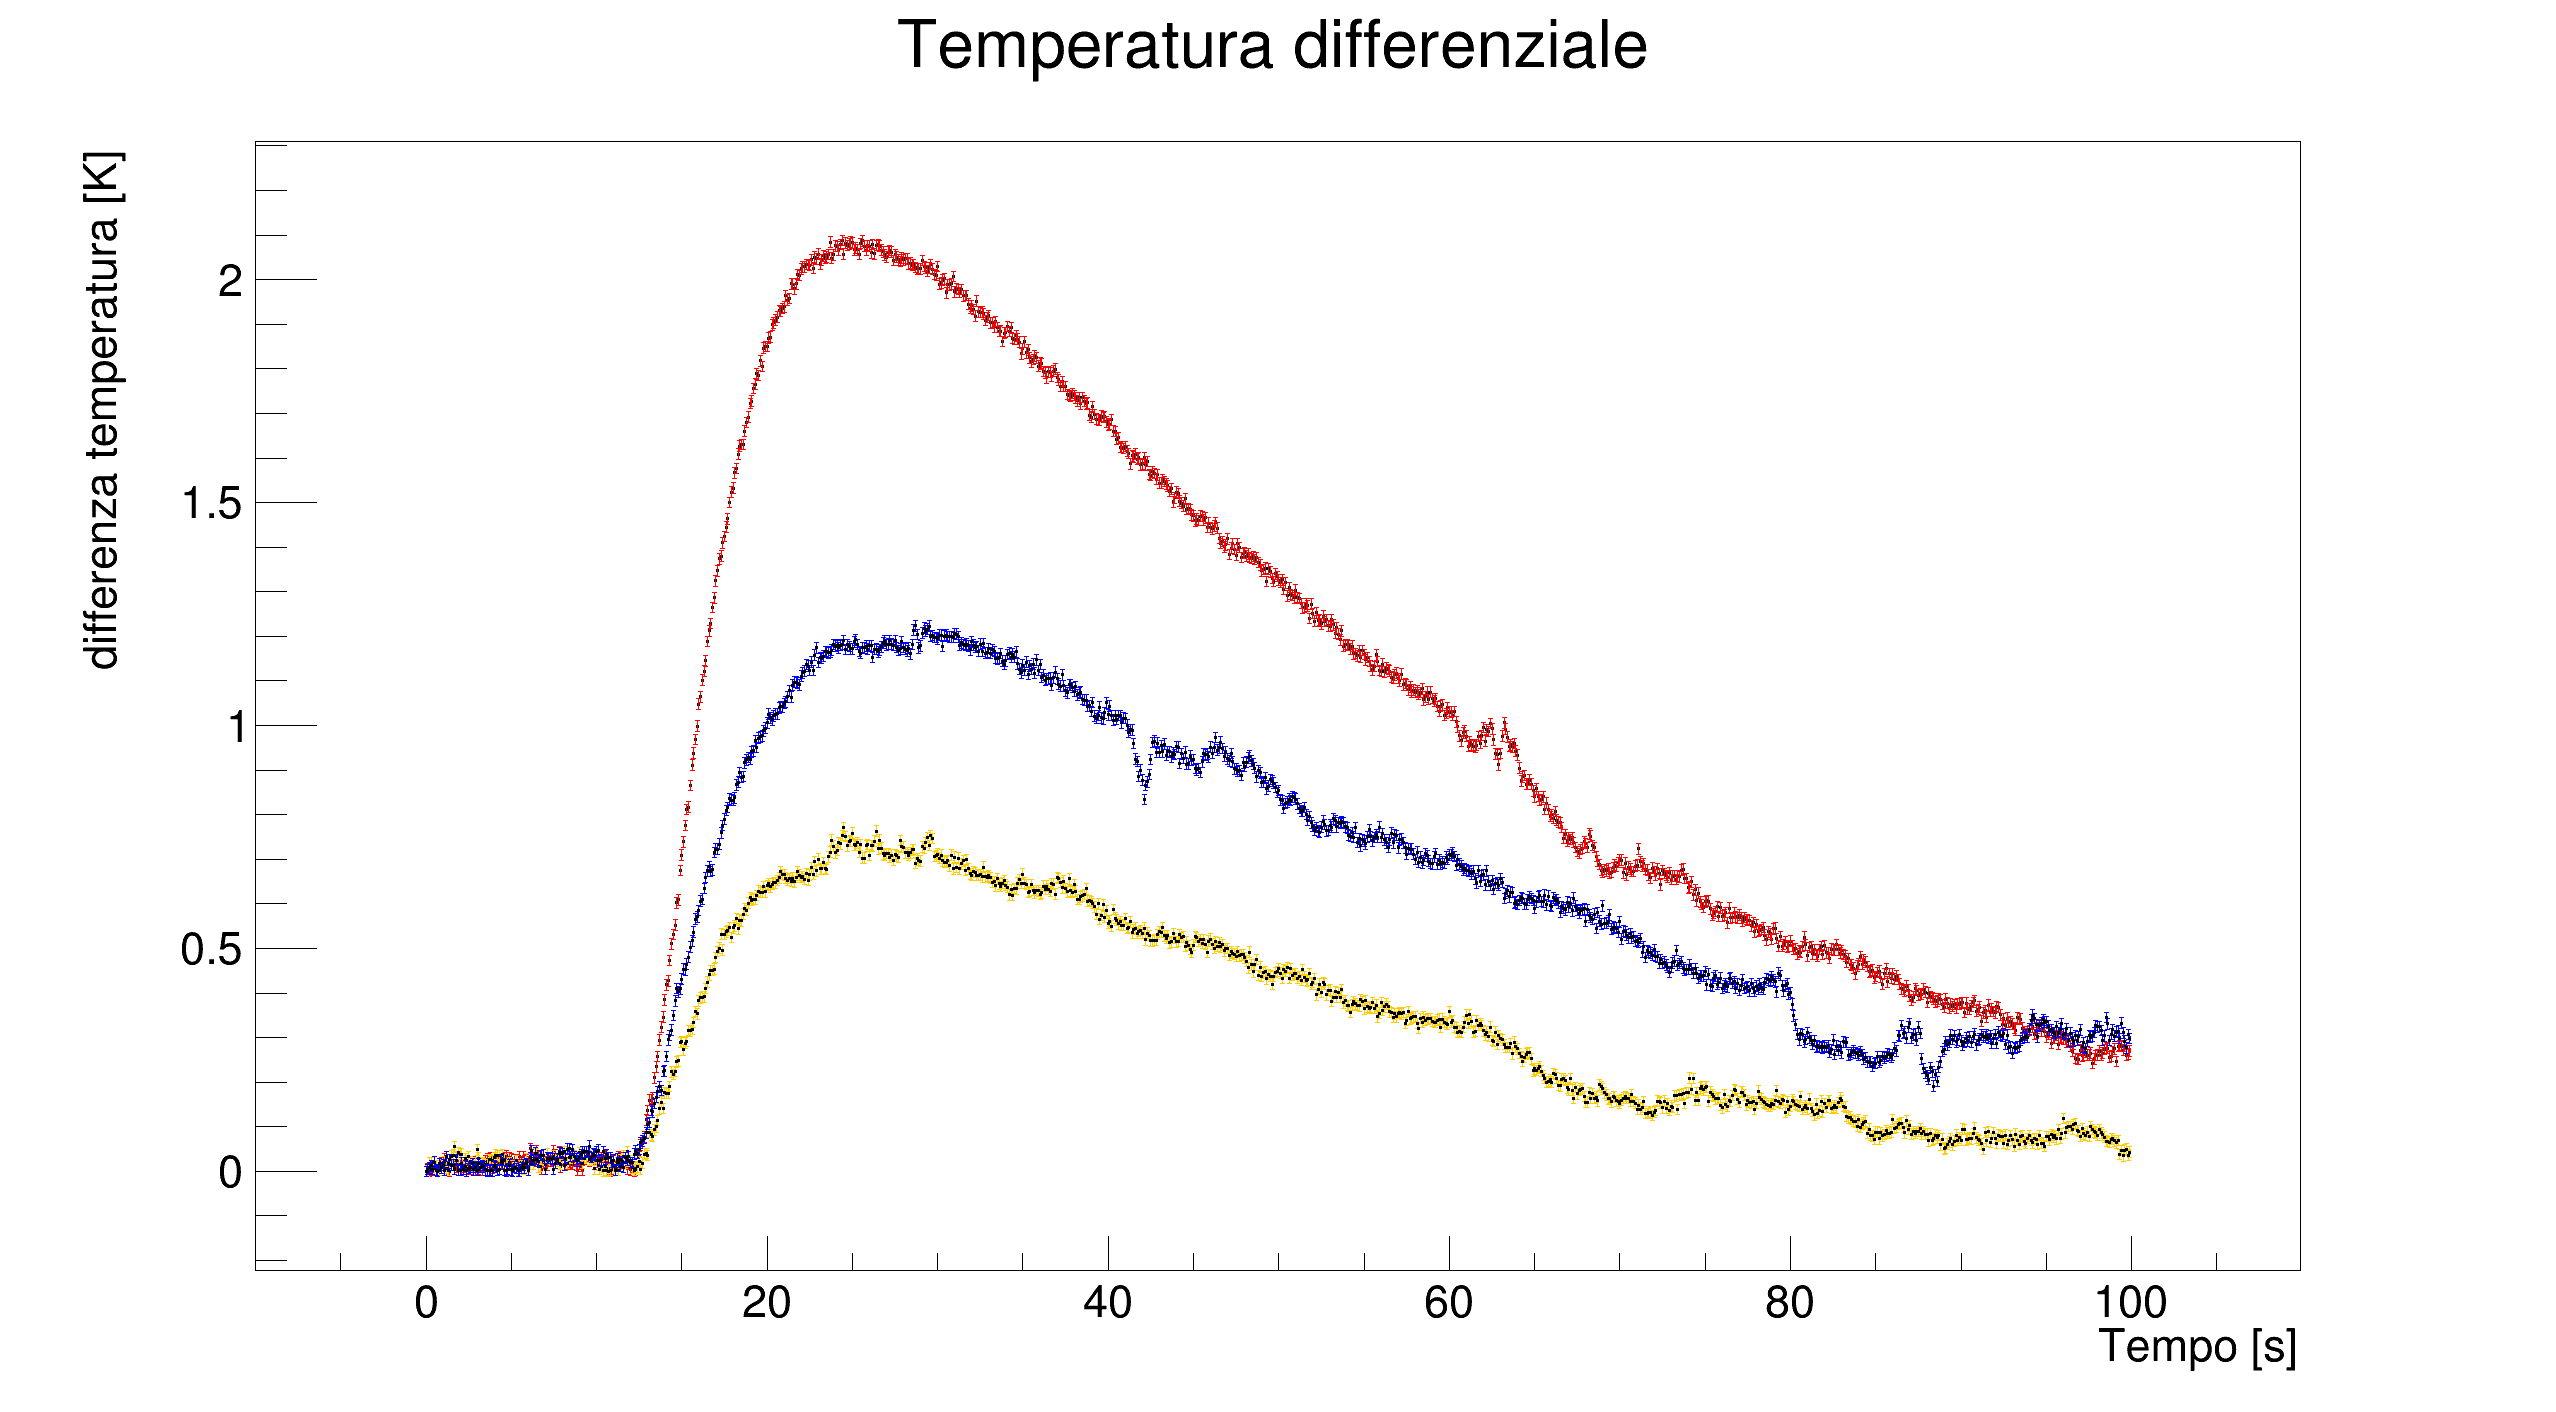

Warning in <TCanvas::Constructor>: Deleting canvas with same name: deltaT


In [22]:
auto deltaT = new TCanvas("deltaT","delatT",2560,1440);

dT4->SetMarkerStyle(7);
dT4->SetLineColor(kRed);
dT4->SetMarkerColor(kBlack);
dT4->SetTitle("Temperatura differenziale");
dT4->GetXaxis()->SetTitle("Tempo [s]");
dT4->GetYaxis()->SetTitle("differenza temperatura [K]");

dT1->SetMarkerStyle(7);
dT1->SetLineColor(kBlue);
dT1->SetMarkerColor(kBlack);

dT3->SetMarkerStyle(7);
dT3->SetLineColor(kOrange);
dT1->SetMarkerColor(kBlack);

deltaT->cd();
dT4->Draw("AP");
dT3->Draw("P");
dT1->Draw("P");
deltaT->Draw();


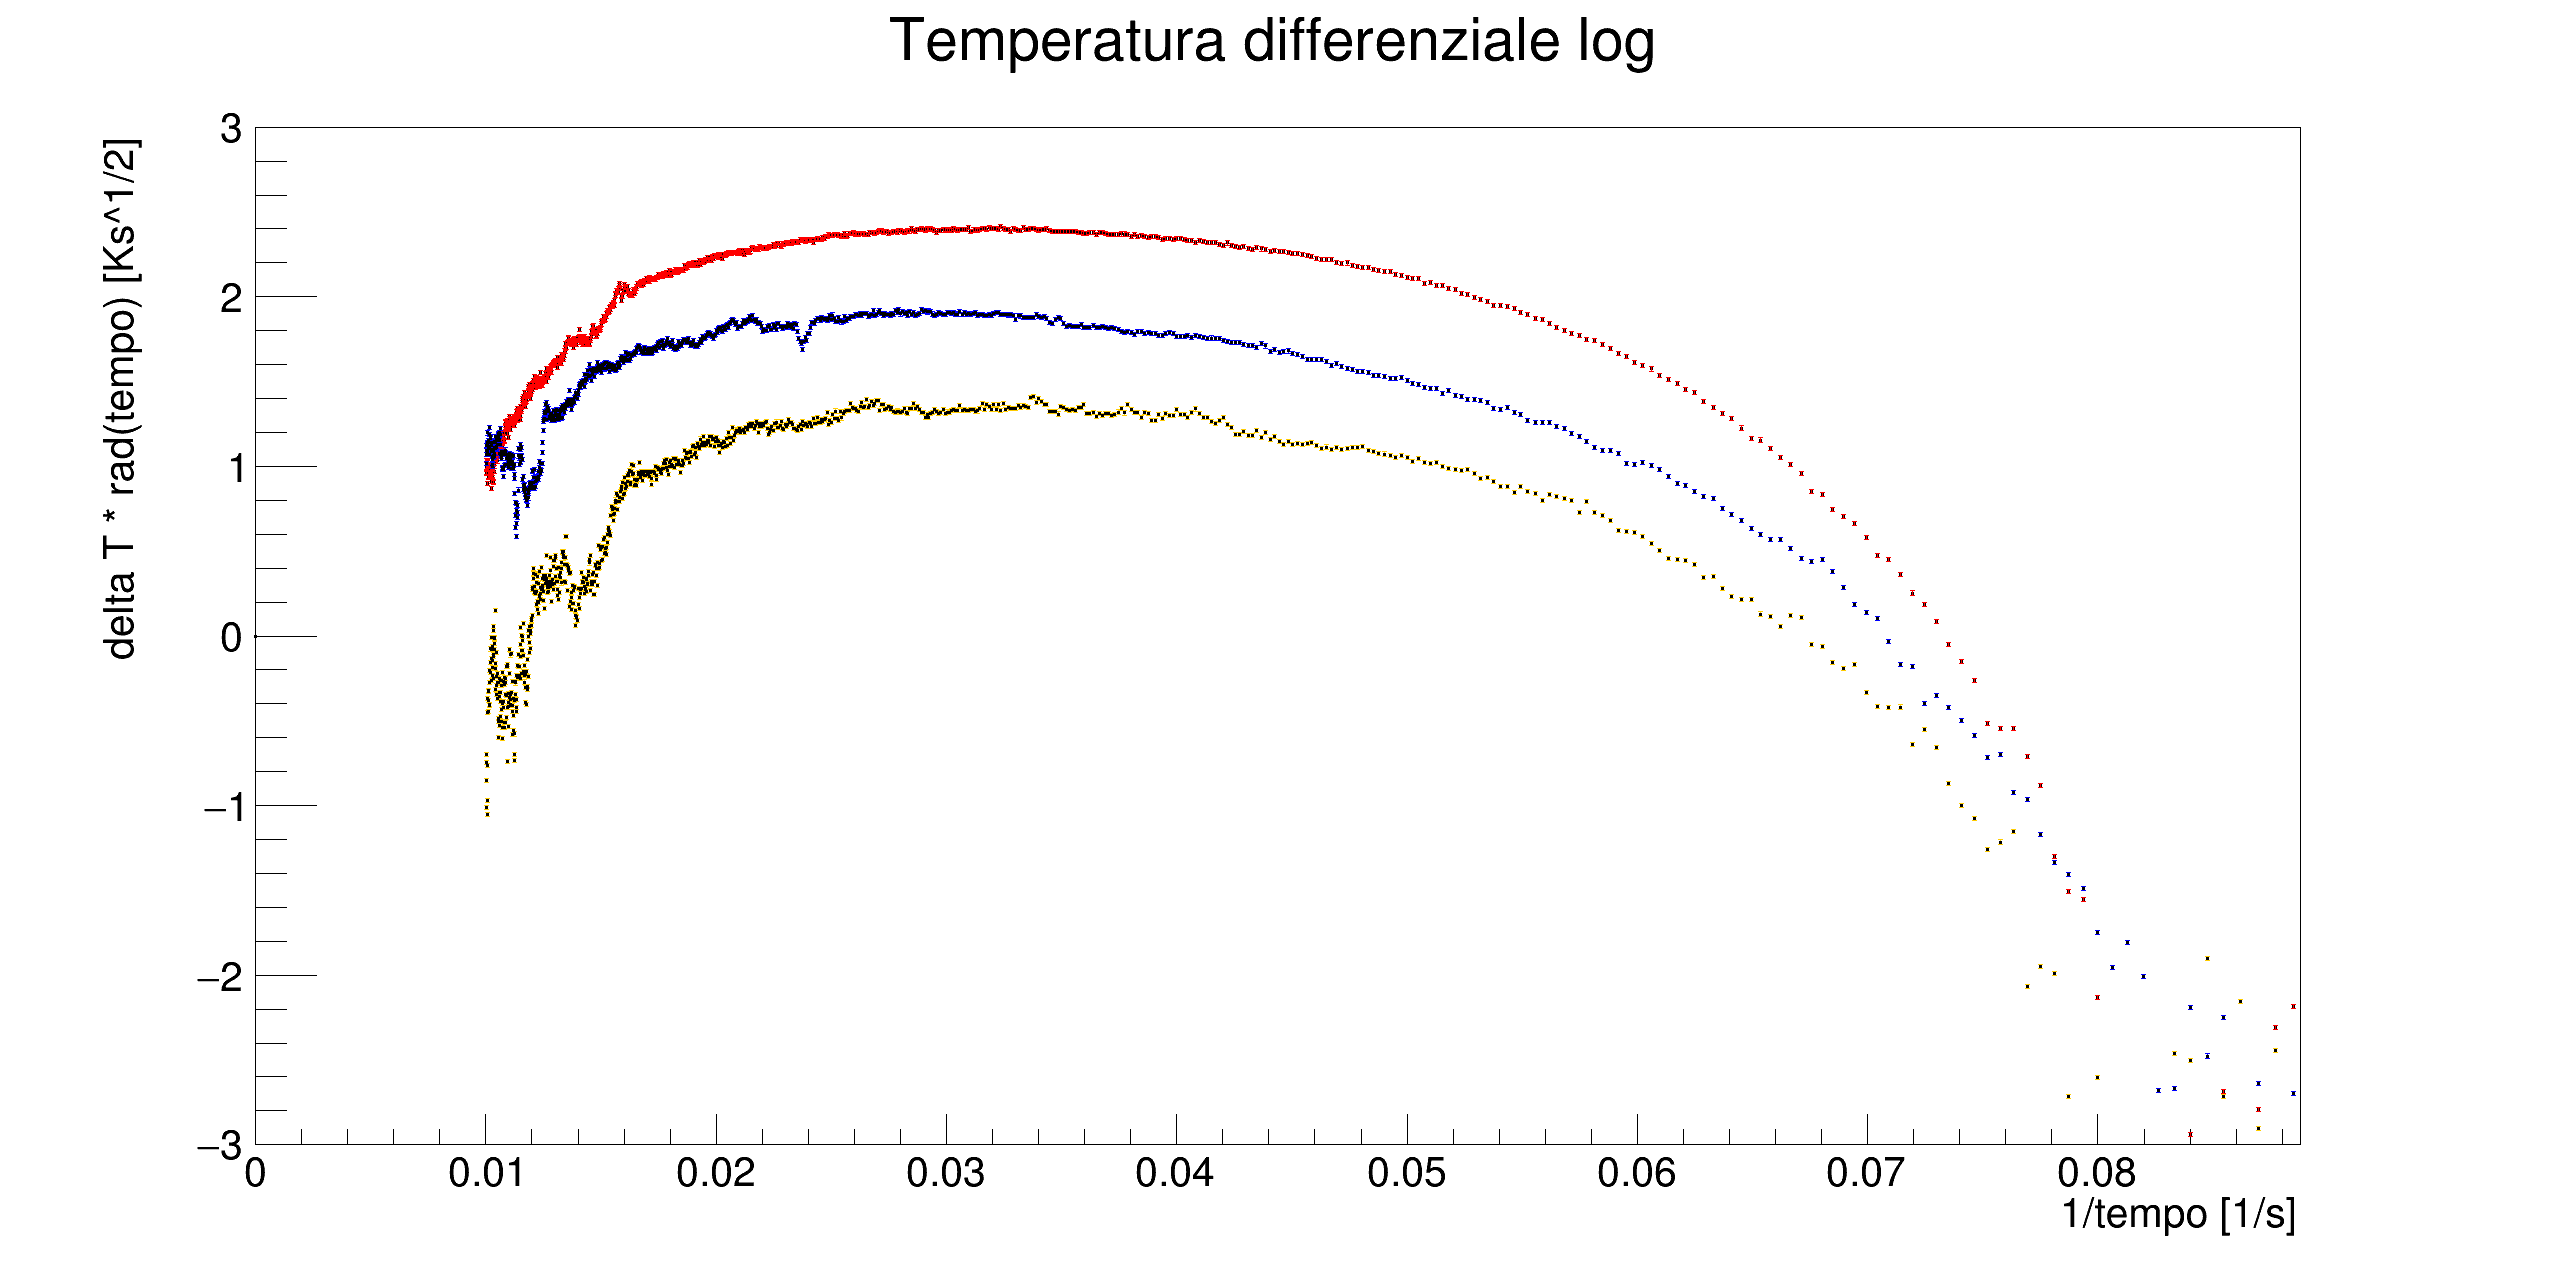

Warning in <TCanvas::Constructor>: Deleting canvas with same name: deltaT_log


In [23]:
auto deltaT_log = new TCanvas("deltaT_log","delatT_log",2560,1300);

log4->SetMarkerStyle(7);
log4->SetLineColor(kRed);
log4->SetMarkerColor(kBlack);
log4->SetTitle("Temperatura differenziale log");
log4->GetXaxis()->SetTitle("1/tempo [1/s]");
log4->GetYaxis()->SetTitle("delta T * rad(tempo) [Ks^1/2]");
log4->GetXaxis()->SetRange(1.,8.);
log4->GetYaxis()->SetRangeUser(-3.,3.);

log1->SetMarkerStyle(7);
log1->SetLineColor(kBlue);
log1->SetMarkerColor(kBlack);

log3->SetMarkerStyle(7);
log3->SetLineColor(kOrange);
log3->SetMarkerColor(kBlack);

deltaT_log->cd();
log4->Draw("AP");
log1->Draw("P");
log3->Draw("P");
deltaT_log->Draw();

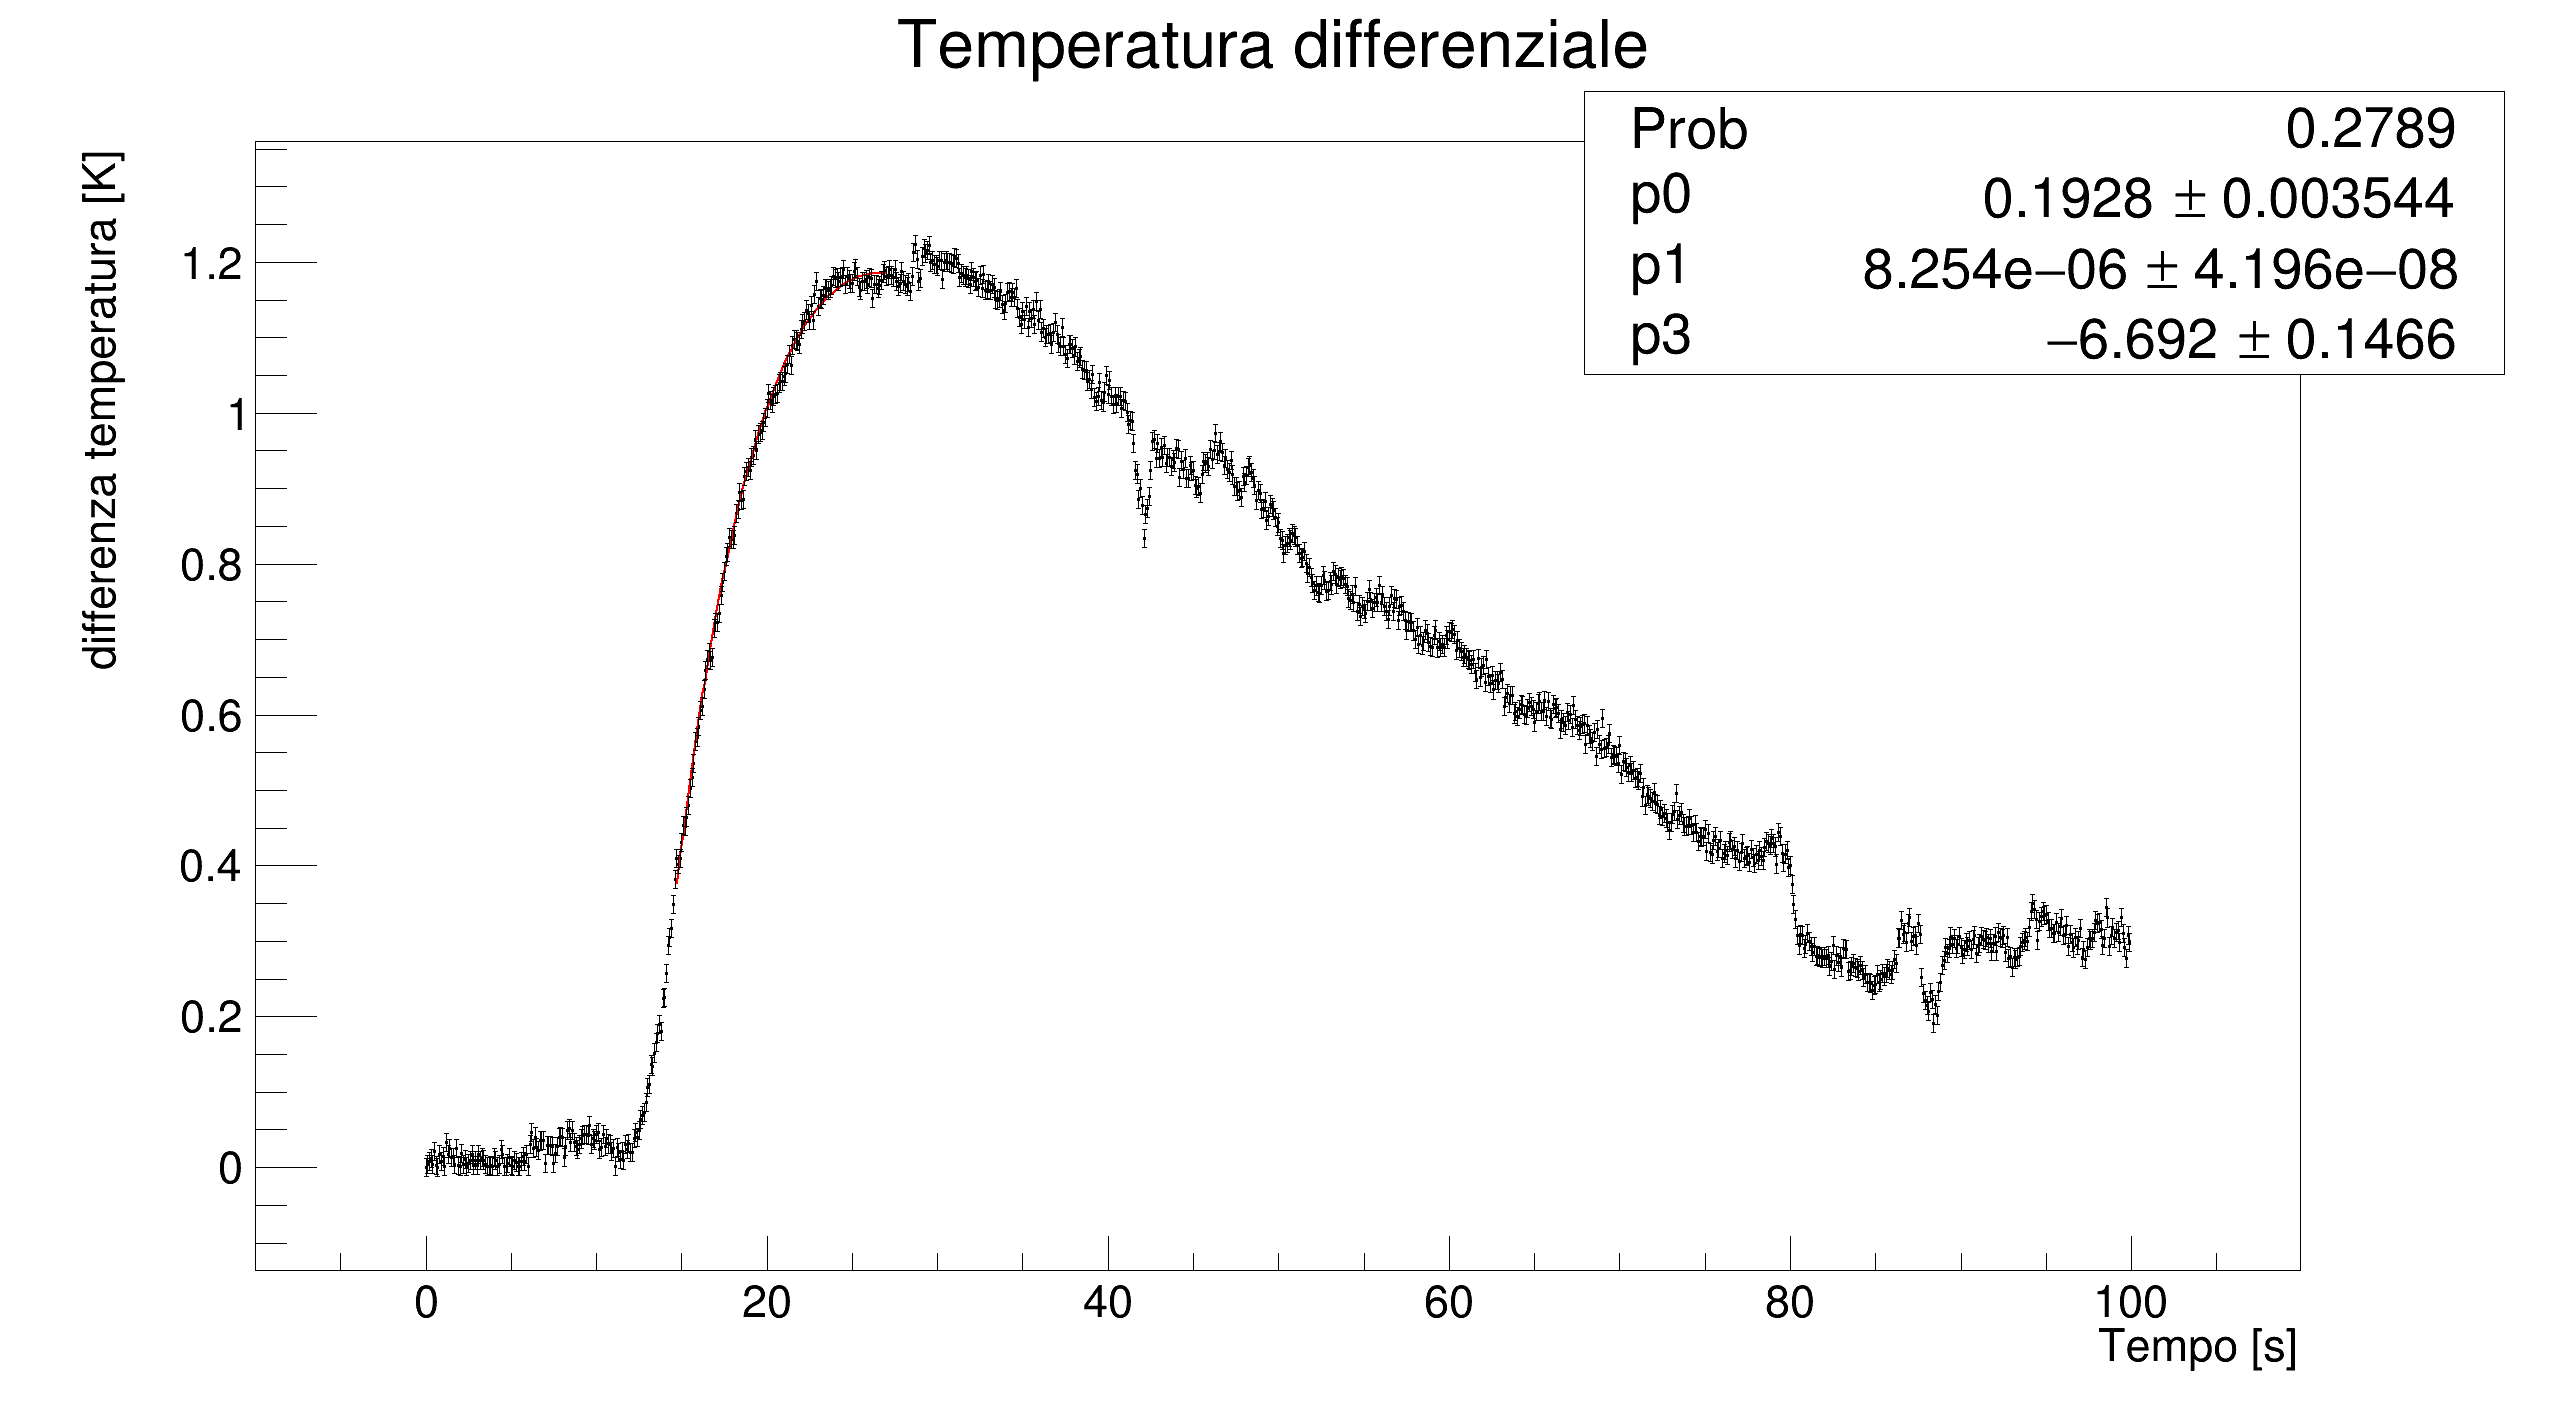

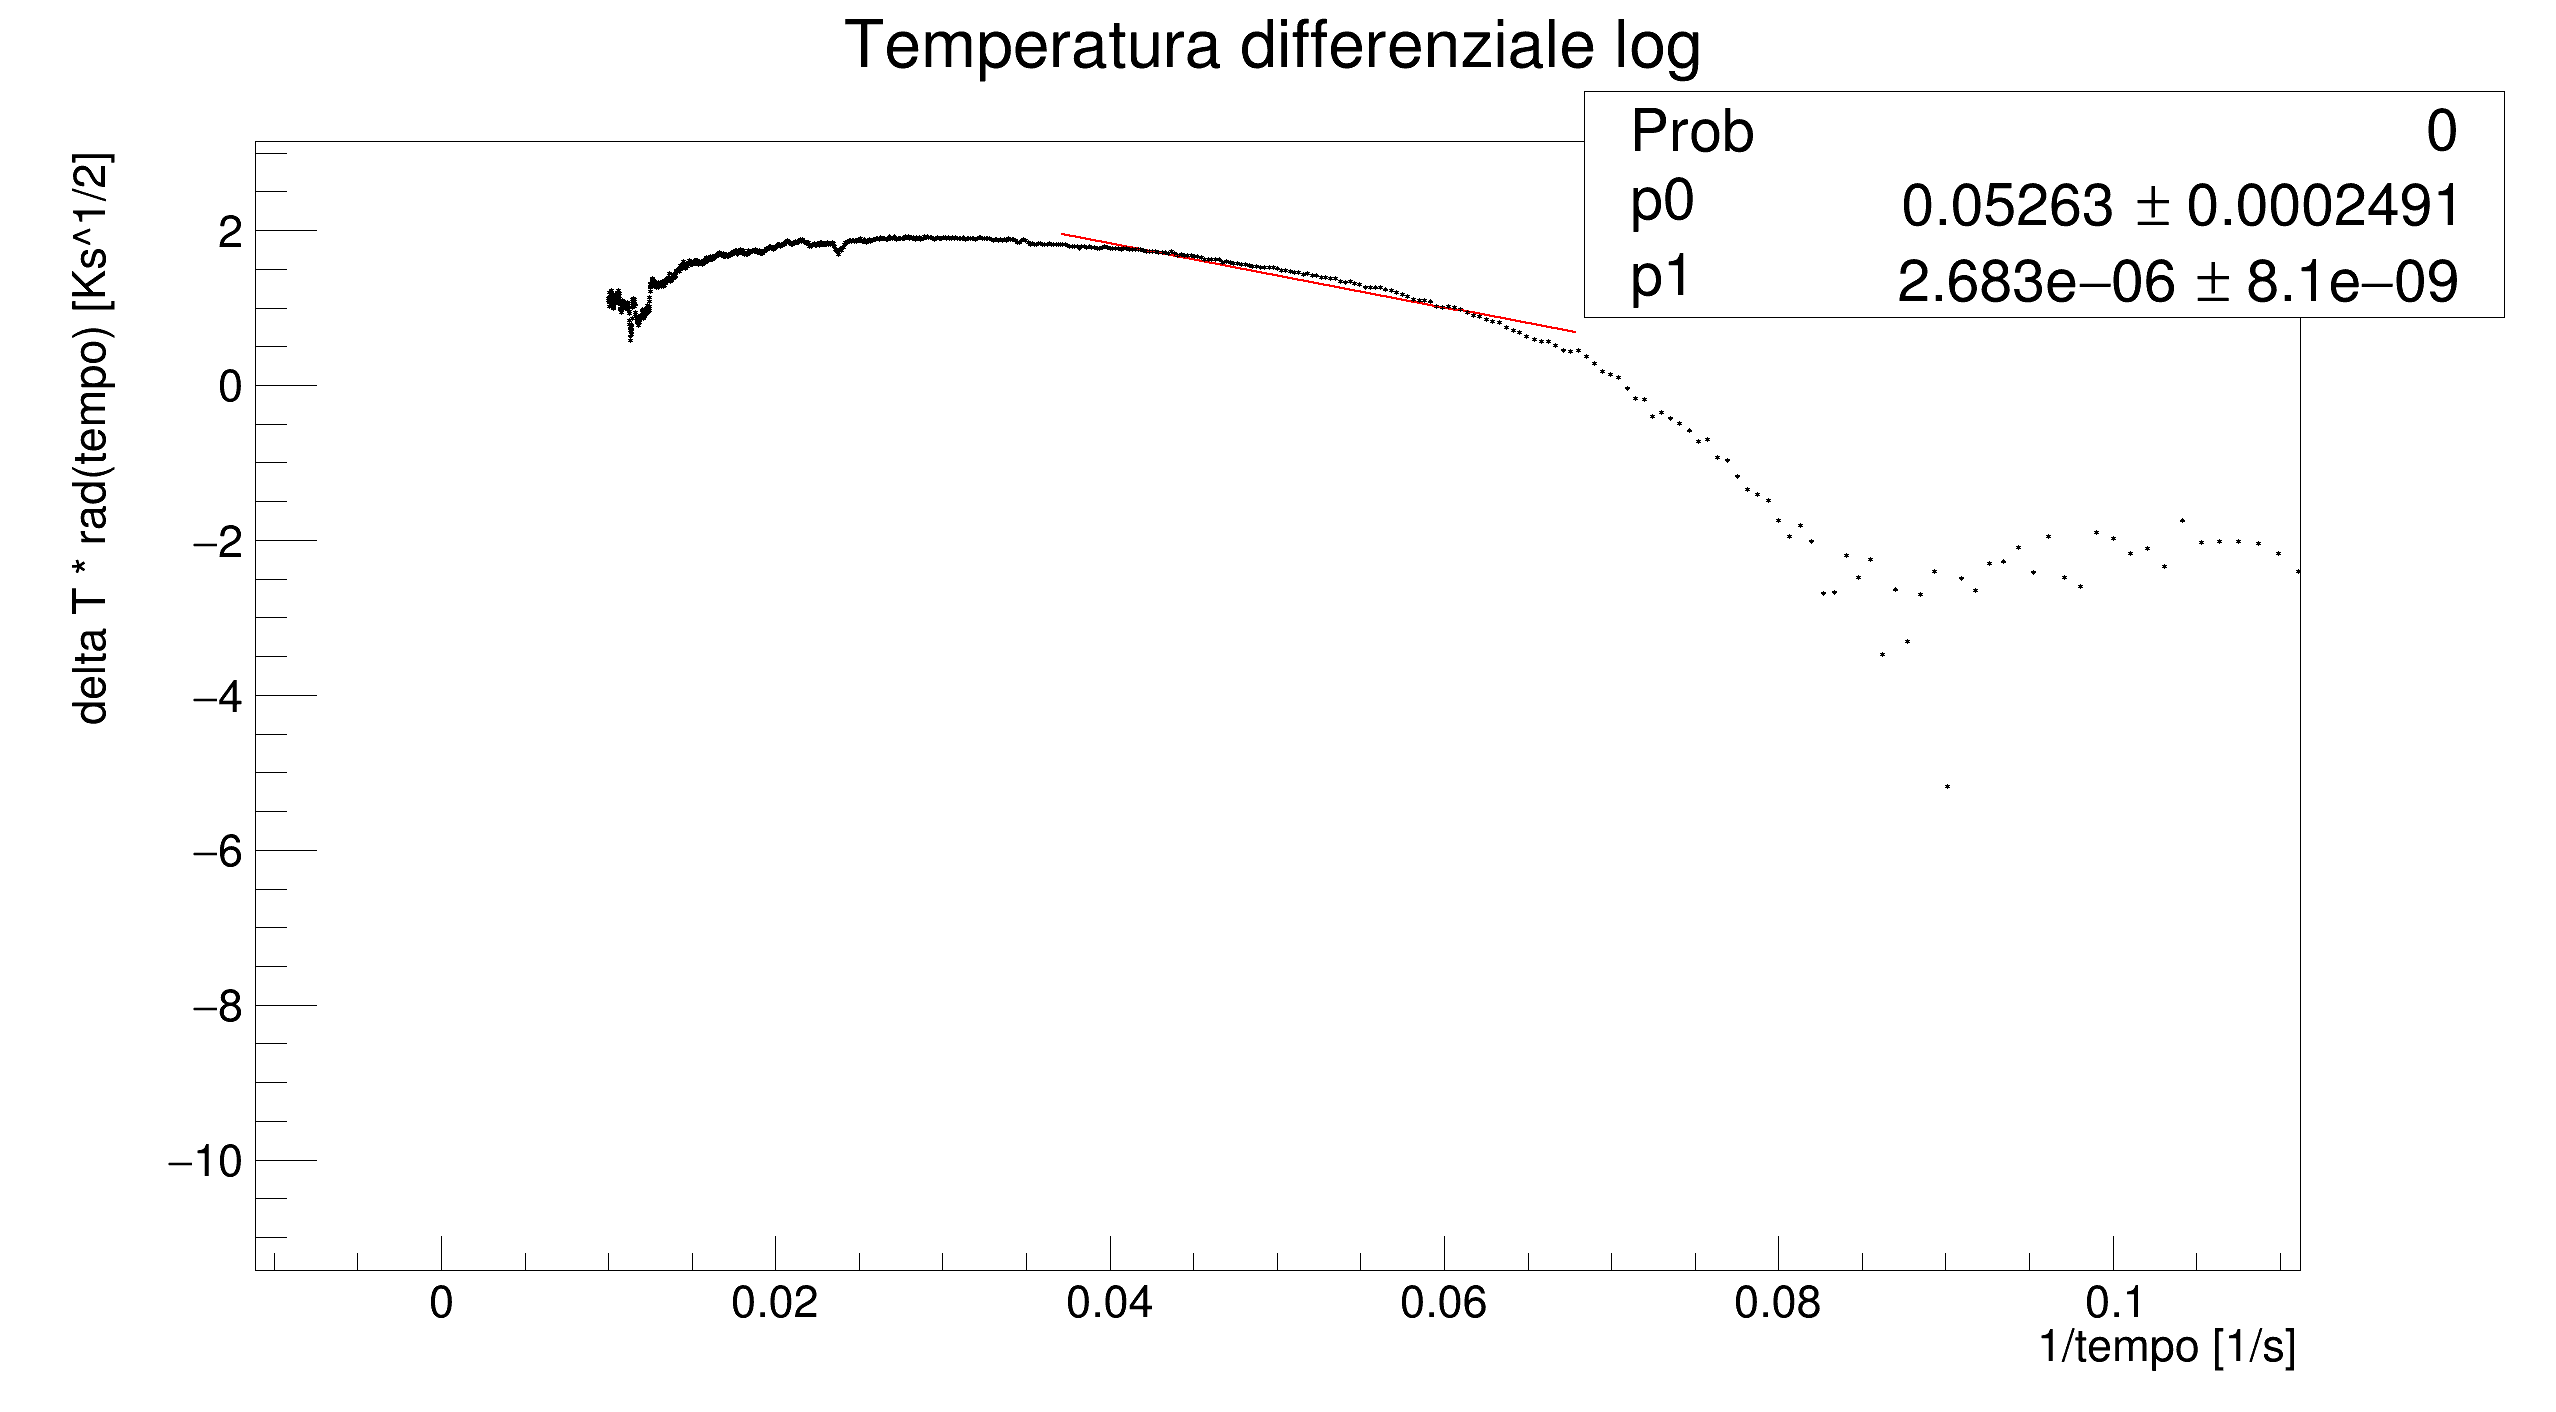

il valore di D usando il valore massimo di temperatura ad x fissato è: 7.68293e-06
 FCN=129.654 FROM MIGRAD    STATUS=CONVERGED     421 CALLS         422 TOTAL
                     EDM=7.7145e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.92843e-01   3.54413e-03  -1.12989e-07  -4.05811e-01
   2  p1           8.25385e-06   4.19628e-08  -2.03749e-11   1.38720e+03
   3  p2           2.10000e-02     fixed    
   4  p3          -6.69151e+00   1.46601e-01   9.60330e-06  -9.12892e-03
il p-value per il fit è: 0.278869
il valore di D ottenuto con il metodo di fit della temperatura in funzione del tempo è: 8.25385e-06

 FCN=6423.34 FROM MIGRAD    STATUS=CONVERGED     157 CALLS         158 TOTAL
                     EDM=4.511e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: deltaT
Warning in <TCanvas::Constructor>: Deleting canvas with same name: deltaT_log


In [2]:

gStyle->SetOptFit(1011);

double ord_D = (d*d)/(2*t_max);
//cout << t_max << endl;
cout << "il valore di D usando il valore massimo di temperatura ad x fissato è: " << ord_D << endl;


auto f1 = new TF1("f1","[0]*exp(-([2]*[2])/(4*[1]*x))/sqrt([1]*x) + [3]",14.7,27); //0 = C, 1 = D, 2 = dist, 3 = offset
auto f2 = new TF1("f2","log([0]/sqrt([1]))-x*([2]*[2])/(4*[1])",0.037,0.068);      //0 = C, 1 = D, 2 = dist

f1->SetParameters(0.4, 9.9e-6, d, 0);
f1->FixParameter(2, d);
f2->SetParameters(0.4, ord_D, d); //[0] Costante, [1] D, [2] distanza
f2->FixParameter(2, d);

//FIT T(t)
gr1->Fit("f1","R");
double p1 = f1->GetProb();
cout << "il p-value per il fit è: " << p1 << endl;
double D1 = f1->GetParameter(1);
cout << "il valore di D ottenuto con il metodo di fit della temperatura in funzione del tempo è: " << D1 << endl;
cout << endl;

//FIT LINEARIZZAZIONE
gr2->Fit("f2","R");
double p2 = f2->GetProb();
cout << "il p-value per la linearizzazione è: " << p2 << endl;
double D2 = f2->GetParameter(1);
cout << "il valore di D ottenuto con il metodo di linearizzazione: " << D2 << endl;